# Before augmentation of the dataset

In [46]:
from tensorflow.keras.utils import image_dataset_from_directory

training_dataset = image_dataset_from_directory(
  "dataset/train/",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

validation_dataset = image_dataset_from_directory(
  "dataset/train/",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  batch_size=32)


Found 410 files belonging to 3 classes.
Using 328 files for training.
Found 410 files belonging to 3 classes.
Using 82 files for validation.


In [47]:
class_names = training_dataset.class_names
print(class_names)

['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS']


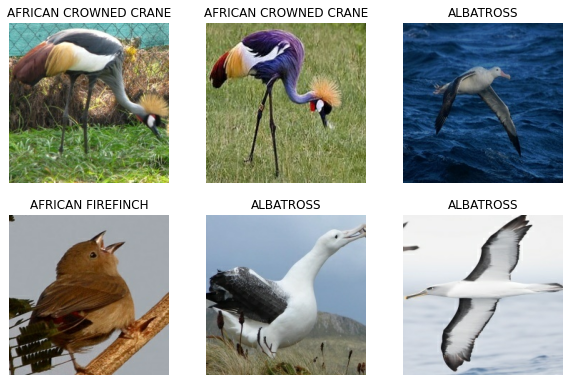

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10)) # Maximum size of the image that is showed in ipynb.
for images, labels in training_dataset.take(1): # Acessing images in the first take.
    for i in range(6):
        ax = plt.subplot(3,3, i + 1) # Max rows. Max columns. Index aka first index is upper left corner position.
        plt.imshow(images[i].numpy().astype("uint8")) # Showing the image i.
        plt.title(class_names[labels[i]])  # Assing title to image i.
        plt.axis("off") # Removing x and y description/numbers.


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

number_of_classes = len(class_names)
model = Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=3, input_shape=(224,224,3), activation="relu")) # Makes it a convolutional neural network
model.add(layers.MaxPool2D(pool_size=2)) # Downscales the images.
model.add(layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(layers.MaxPool2D(pool_size=2)) # Downscales the images.
model.add(layers.Flatten()) # Makes the images into one single row. From 2d to 1d.
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss = 'binary_crossentropy', metrics=['accuracy'])

model.fit(training_dataset,
          validation_data=validation_dataset,
          epochs=6)


Epoch 1/6
11/11 [==============================] - 1s 37ms/step - loss: -278.5838 - accuracy: 0.3384 - val_loss: -766.7386 - val_accuracy: 0.2683
Epoch 2/6
11/11 [==============================] - 0s 30ms/step - loss: -2476.7817 - accuracy: 0.3598 - val_loss: -3257.9104 - val_accuracy: 0.2683

In [32]:
model.summary()



Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 93312)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 93313     
Total params: 103,457
Trainable params: 103,457
Non-trainable params: 0
_______________________________________________

## Summary
Becuase of so little data the los function is having a hard time. And, because there are so little data to train on the
accuracy doesn`t improve much

